In [2]:
from os import listdir
from os.path import isfile, join
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import os
import galsim
from astropy.io import fits as pf

# Array of filenames in folder acs_mosaic_2.0
files = [f for f in listdir('../acs_mosaic_2.0') if isfile(join('../acs_mosaic_2.0', f))]
#Galsim catalog 
galsim_file = './COSMOS_23.5_training_sample/real_galaxy_catalog_23.5.fits'
galsim_cat = pf.open(galsim_file)[1].data


FileNotFoundError: [Errno 2] No such file or directory: '../acs_mosaic_2.0'

Galsim is a simulation software that allows to reproduce astronomical scenes of the deep sky. For this it uses analytical profiles, but also models of galaxies built from real images of the COSMOS fields. The good news is that all of our AGN images are from the COSMOS fields too!

Galsim uses a catalog of galaxies and allows user to draw images for these galaxies on a pixel grid, but also allows to draw their PSFs. Be sure to download the catalog here: [https://github.com/GalSim-developers/GalSim/wiki/RealGalaxy%20Data](https://github.com/GalSim-developers/GalSim/wiki/RealGalaxy%20Data)
and to install galsim.

In [1]:
i=2 #Index of files start at 2
ras = []
decs = []
#Stores ra and dec coordinates of HST AGNs
for f in files:
    ra, dec = f.split('_')[1:3]
    if f.split('_')[-1] == 'sci.fits':
        #print(ra, dec)
        ras.append(np.float(ra))
        decs.append(np.float(dec))
        i+=1

#Now arrays ras and decs contain the ra-dec coordinates of the centers of all the HST AGN images


NameError: name 'files' is not defined

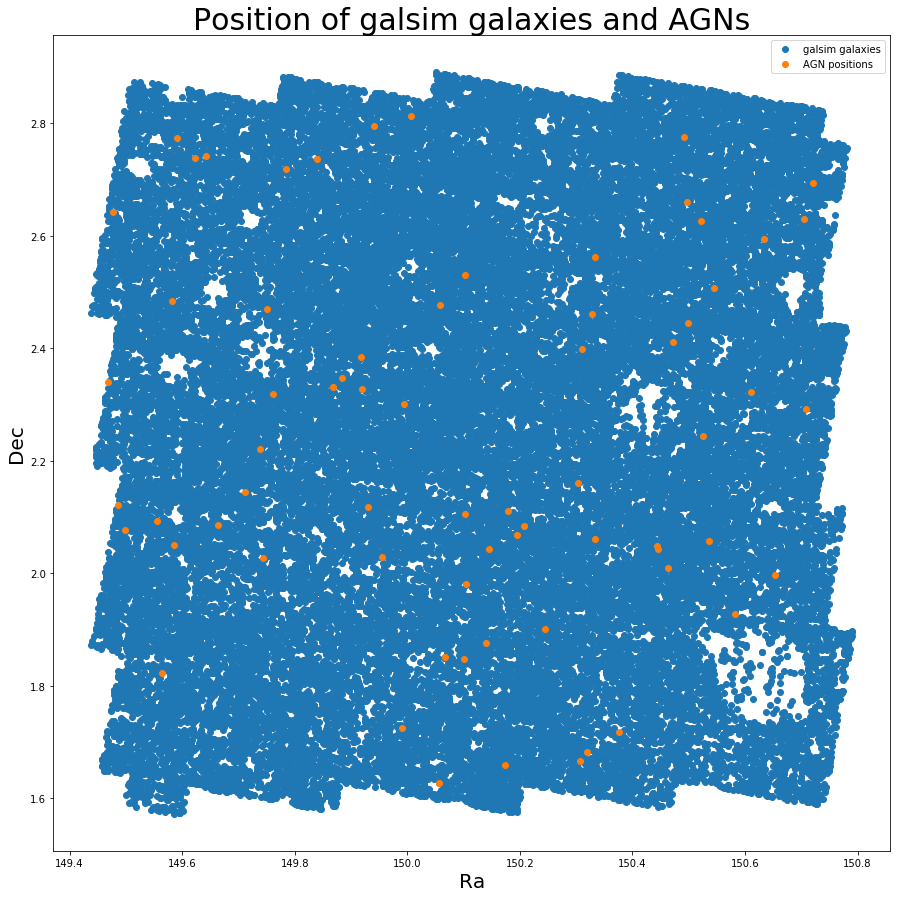

69


In [4]:
#Coordinates of all the galaxies in the galsim COSMOS sample
gal_ra, gal_dec = [], []
for g in galsim_cat:
    ra, dec = g[1], g[2]
    gal_ra.append(ra)
    gal_dec.append(dec)

#Positions of AGN and galsim sources
plt.figure(figsize = (15,15))
plt.title('Position of galsim galaxies and AGNs', fontsize = '30')
plt.plot(np.array(gal_ra), np.array(gal_dec), 'o', label = 'galsim galaxies')
plt.plot(np.array(ras), np.array(decs), 'o', label = 'AGN positions')
plt.xlabel('Ra', fontsize = 20)
plt.ylabel('Dec', fontsize = 20)
plt.legend()
plt.show()
print(i-2)

(array([25]), array([25]))


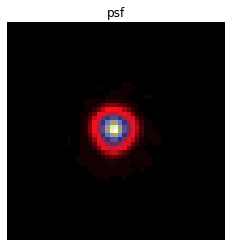

In [5]:
def galsim_psf_picker(index, catalog):
    """ A function that extract the psf of a galsim galaxy
    
    Paramters
    ---------
    index: int 
        index of the galsim galaxy for which we want to extract the psf
    catalog: list
        list of galsim object from a galsim catalog
    returns
    -------
    psf: array
        image of the psf for galsim image at index `index`
    """
    gal_cat = galsim.RealGalaxyCatalog(file_name=catalog)    
    psf = gal_cat.getPSF(index).drawImage(nx=51, ny=51, scale=0.03, method='real_space', offset = (-1,-1))
    return psf.array

# Example of how the psf picker works:
# Show the psf for the first galaxy in the galsim catalog:
psf0 = galsim_psf_picker(0, galsim_file)
print(np.where(psf0 == np.max(psf0)))
plt.title('psf')
plt.imshow(psf0, cmap = 'gist_stern')#Use np.log10(psf0) to reveal seemingly hidden features.
plt.axis('off') #Remove the indexation of the x and y axes
plt.show()

What we want is to extract the HST PSF for each AGN (orange point on the first plot).
To do so, we use galsim images. Galsim has a set of PSF modeled for each galaxy in the COSMOS sample. 
catalog `gal_cat` contains a list of galaxies, the coordinates of which are represented in blue in the first plot and stored in variables `gal_ra` and `gal_dec`.

For each AGN, we will find the closest galaxy in the galsim sample and record its index. then we will use the function `galsim_psf_picker` to extract the psf from this galaxy and we will use it a psf for the corresponding AGN. To do so, we will save the psf as a file that has the following name: 
`'index_ra_dec_HST_psf.fits'`. In the name ra and dec should be replaced by the value of the coordinates of the psf and index should be the index of the AGN to which this PSF corresponds.

Make sure you understand what every variable contains. Doing a print of the variables that you are not sure about helps.

You can save images as fits files using instructions found here [https://docs.astropy.org/en/stable/io/fits/#creating-a-new-fits-file](https://docs.astropy.org/en/stable/io/fits/#creating-a-new-fits-file)

In [1]:
# Your turn now!

# We need a psf for each AGN galaxy in our sample 
# This requires finding for each AGN galaxy the closest galsim galaxy. 

# We will start by creating an array of size 2*N (N: the number of galaxies in our sample) that contains the coordinates of the AGN galaxies.
#Note, at the moment, these coordinates are in arrays `ras` and `decs` of size N each
coord = np.array([ras, decs]).T
indAgn = 2
for c in coord:
    #c should be a coordinate point of size 2 with the ra,dec coordinates of an AGN galaxy
    #Now compute the distance between c and each point of the galsim catalog
    d = np.sqrt( ((c[0]-gal_ra)**2)+(c[1]-gal_dec)**2)
#     print(c[0], c[1])
#     print(gal_ra[:10], gal_dec[:10])
    
    # find the index of the closest galsim galaxy to `c`
    ind = np.where(d == np.min(d))[0][0]
    #Exctract the psf for the galsim galaxy at index `ind`
    psf = galsim_psf_picker(ind, galsim_file)
    #Save the PSF in a fits file which name starts with the index of the AGN galaxy (be careful, it's not the index of the galsim galaxy)
    hdu = pf.PrimaryHDU(psf)
    hdul = pf.HDUList([hdu])
    #The final name of your files should look something like '2-psf-HST-COSMOS.fits', '3-psf-HST-COSMOS.fits', etc
    hdul.writeto(f'HST_psfs/{indAgn}-psf-HST-COSMOS.fits')
    indAgn+=1

NameError: name 'np' is not defined